In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2, SelectFromModel
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

In [6]:
train = pd.read_csv("CSI4810_projectVehicleData/slectedFeaturesTrain.csv")
target = train.pop("loan_default")
test = pd.read_csv("CSI4810_projectVehicleData/slectedFeaturesTest.csv")

---

#### <b>Modeling</b>

---

##### Testing different LogReg model parameters

In [7]:
normalizedTrain = pd.DataFrame(StandardScaler().fit_transform(train), columns=train.columns)
X, Xtest, y, ytest = train_test_split(normalizedTrain, target, test_size=0.2, random_state=42)

In [ ]:
logParams = {
    'solver': ['lbfgs','sag'],
    'class_weight': ['balanced',None],
    'C': [10,1,.01,.001],
}

grid = GridSearchCV(LogisticRegression(max_iter=1000,random_state=42,penalty='l2'), logParams, scoring='f1',verbose=2,n_jobs=-1) 
grid.fit(X,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [10, 1, 0.01, 0.001],
                         'class_weight': ['balanced', None],
                         'solver': ['lbfgs', 'sag']},
             scoring='f1', verbose=2)

In [16]:
# print(grid.best_params_)
logMdl = LogisticRegression(max_iter=200,solver='lbfgs',C=.01,random_state=42,class_weight='balanced').fit(X,y)
print(classification_report(y, logMdl.predict(X)))
print("Validation\n",classification_report(ytest,logMdl.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.84      0.54      0.66    145863
           1       0.28      0.64      0.39     40530

    accuracy                           0.56    186393
   macro avg       0.56      0.59      0.52    186393
weighted avg       0.72      0.56      0.60    186393

Validation
               precision    recall  f1-score   support

           0       0.85      0.53      0.66     36550
           1       0.28      0.65      0.39     10049

    accuracy                           0.56     46599
   macro avg       0.56      0.59      0.52     46599
weighted avg       0.72      0.56      0.60     46599



##### Testing different random forest model parameters

In [80]:
treeParams = {
    'max_depth': [None,10,20,25],
    'min_samples_leaf': [1,3,5],
    'min_impurity_decrease': [0,.01],
}
grid = GridSearchCV(RandomForestClassifier(random_state=42,class_weight='balanced',criterion='entropy'), treeParams, scoring='f1',verbose=2,n_jobs=-1) 
grid.fit(X,y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_impurity_decrease': [0, 0.1, 0.01],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4, 6]},
             scoring='f1', verbose=2)

In [15]:
# print(grid.best_params_)
tree = RandomForestClassifier(max_depth=25,min_samples_leaf=3, class_weight='balanced',random_state=42,criterion='entropy').fit(X,y)
print(classification_report(y, tree.predict(X)))
print("Validation\n",classification_report(ytest,tree.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92    145863
           1       0.69      0.88      0.77     40530

    accuracy                           0.89    186393
   macro avg       0.82      0.88      0.85    186393
weighted avg       0.90      0.89      0.89    186393

Validation
               precision    recall  f1-score   support

           0       0.82      0.82      0.82     36550
           1       0.33      0.33      0.33     10049

    accuracy                           0.71     46599
   macro avg       0.57      0.57      0.57     46599
weighted avg       0.71      0.71      0.71     46599



##### Testing different XGBoot model parameters

In [133]:
xgbParams = {
    'max_depth': [3,5,7,10,15,20],
    'min_child_weight': [1,3,5],
    'learning_rate': [.1,.05,.01],
    'n_estimators':[50,100,250,500],
    'scale_pos_weight': [3.25,3.5,3.75]
}
grid = GridSearchCV(XGBClassifier(booster='gbtree',
                    scale_pos_weight=3.5,
                    objective='binary:logistic',
                    seed=42,
                    ), xgbParams, scoring='f1',verbose=2,n_jobs=-1) 
grid.fit(X,y)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 5, 7, 10, 15, 20],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200, 500],
                         'scale_pos_weight': [3.25, 3.5, 3.75]},
             scoring='f1', verbose=2)

In [14]:
# print(grid.best_params_) 
xgb = XGBClassifier(booster='gbtree',
                    scale_pos_weight=3.75,
                    objective='binary:logistic',
                    seed=42,
                    n_estimators=250,
                    min_child_weight=1,
                    max_depth=5,
                    learning_rate=.1
                    ).fit(X,y)
print(classification_report(y, xgb.predict(X)))
print("Validation\n",classification_report(ytest,xgb.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.88      0.59      0.70    145863
           1       0.32      0.71      0.45     40530

    accuracy                           0.61    186393
   macro avg       0.60      0.65      0.57    186393
weighted avg       0.76      0.61      0.65    186393

Validation
               precision    recall  f1-score   support

           0       0.86      0.58      0.69     36550
           1       0.30      0.67      0.42     10049

    accuracy                           0.60     46599
   macro avg       0.58      0.62      0.55     46599
weighted avg       0.74      0.60      0.63     46599



---

### Scoring & Validation

In [19]:
def score_dataset(xx, yy,model):
    score = cross_validate(
        model, xx, yy, cv=5, scoring=['f1','roc_auc','accuracy'],verbose=2
    )
    return (("f1",score['test_f1'].mean(), score['test_f1'].std()),
             ("accuracy",score['test_accuracy'].mean(),score['test_accuracy'].std()),
               ("roc_auc",score['test_roc_auc'].mean(), score['test_roc_auc'].std()))

In [20]:
score_dataset(X, y,
                model=LogisticRegression(max_iter=200,solver='lbfgs',C=.01,class_weight='balanced'))

[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s


(('f1', 0.3868083709584396, 0.002523015503731724),
 ('accuracy', 0.5592162751301037, 0.001020744253287091),
 ('roc_auc', 0.6211699121345514, 0.0015551296441321878))

In [22]:
score_dataset(X, y,
                model=RandomForestClassifier(max_depth=25,min_samples_leaf=3, class_weight='balanced',criterion='entropy'))

[CV] END .................................................... total time= 2.5min
[CV] END .................................................... total time= 2.8min
[CV] END .................................................... total time= 2.3min
[CV] END .................................................... total time= 1.8min
[CV] END .................................................... total time= 2.5min


(('f1', 0.3222882626698137, 0.0024718960753894264),
 ('accuracy', 0.7137607177927077, 0.001094488425899653),
 ('roc_auc', 0.6375675694969389, 0.0012522321024669842))

In [21]:
score_dataset(X,y,
              model=XGBClassifier(booster='gbtree',
                    scale_pos_weight=3.75,
                    objective='binary:logistic',
                    n_estimators=500,
                    min_child_weight=1,
                    max_depth=5,
                    learning_rate=.1
                    ))

[CV] END .................................................... total time=   3.9s
[CV] END .................................................... total time=   4.5s
[CV] END .................................................... total time=   5.1s
[CV] END .................................................... total time=   5.0s
[CV] END .................................................... total time=   4.4s


(('f1', 0.4125531416045461, 0.0014827576437454197),
 ('accuracy', 0.6024743422682675, 0.0019207160360762393),
 ('roc_auc', 0.6597397480320076, 0.0016509529823657716))

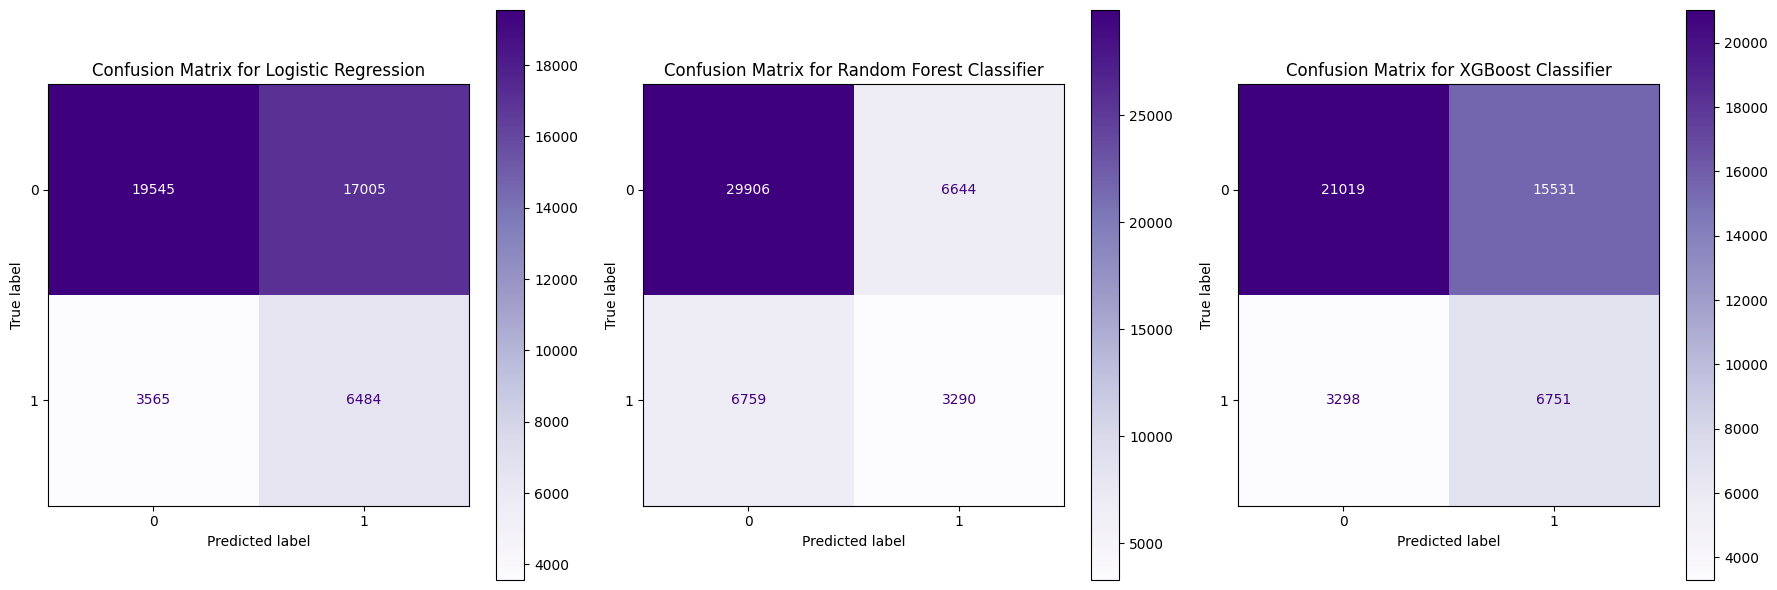

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
names=['Logistic Regression','Random Forest Classifier','XGBoost Classifier']
models=[logMdl, tree, xgb]
for i, model in enumerate(models):
    c = confusion_matrix(ytest, model.predict(Xtest))
    ConfusionMatrixDisplay(confusion_matrix=c).plot(ax=axes[i], cmap='Purples', values_format='d')
    axes[i].set_title(f'Confusion Matrix for {names[i]}')

plt.tight_layout()
plt.show()

---
### Output Model

---

In [5]:
xgb.fit(normalizedTrain,target)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [6]:
import joblib
joblib.dump(xgb, 'xgb.pkl')

['xgb.pkl']

In [1]:
! pip freeze > requirements.txt